In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['images_sample', 'sample_submission.csv', 'test.json', 'train.json']


In [3]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns




In [4]:
train=pd.read_json('../input/train.json')
test=pd.read_json('../input/test.json')

In [5]:
train.head()


,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,low
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,high
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,low
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,low


In [6]:
train['description'].isnull().sum()


0

In [7]:
train.shape

(49352, 15)

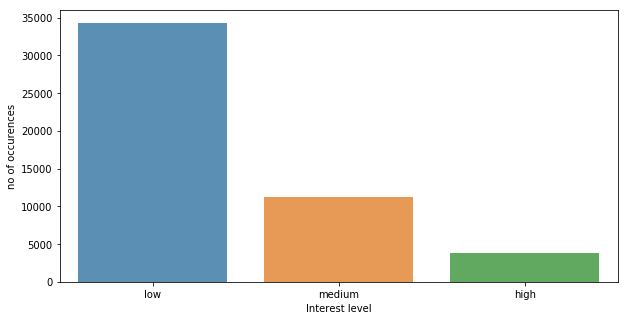

In [8]:
level=train['interest_level'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(level.index,level.values,alpha=0.8)
plt.ylabel("no of occurences")
plt.xlabel("Interest level")
plt.show()

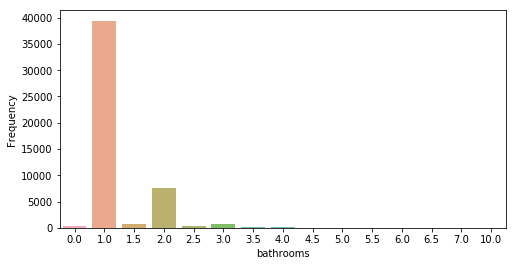

In [9]:
counting=train['bathrooms'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(counting.index,counting.values,alpha=0.8)
plt.ylabel('Frequency')
plt.xlabel('bathrooms')
plt.show()

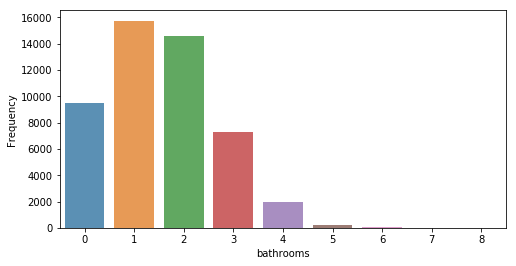

In [10]:
counting=train['bedrooms'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(counting.index,counting.values,alpha=0.8)
plt.ylabel('Frequency')
plt.xlabel('bathrooms')
plt.show()

In [11]:
train['num_photos']=train['photos'].apply(len)
train['len_description']=train['description'].apply(len)
train['num_features']=train['features'].apply(len)
train['created']=pd.to_datetime(train['created'])
train['year']=train['created'].dt.year
train['month']=train['created'].dt.month
train['day']=train['created'].dt.day


In [ ]:
train.head()

In [13]:
y=train['interest_level']


In [14]:
y

10        medium
10000        low
100004      high
100007       low
100013       low
100014    medium
100016       low
100020       low
100026    medium
100027       low
100030       low
10004        low
100044      high
100048       low
10005        low
100051    medium
100052       low
100053       low
100055       low
100058       low
100062       low
100063    medium
100065       low
100066       low
10007     medium
100071       low
100075    medium
100076       low
100079      high
100081       low
           ...  
99915        low
99917        low
99919     medium
99921     medium
99923        low
99924        low
99931        low
99933        low
99935        low
99937        low
9994         low
99953        low
99956        low
99960     medium
99961        low
99964     medium
99965        low
99966        low
99979        low
99980        low
99982       high
99984        low
99986        low
99987        low
99988     medium
9999      medium
99991        low
99992        l

In [15]:
train=train.drop(['building_id','created','description','display_address','interest_level','features','manager_id','photos','street_address'],axis=1)

In [16]:
train


,bathrooms,bedrooms,latitude,listing_id,longitude,price,num_photos,len_description,num_features,year,month,day
10,1.5,3,40.7145,7211212,-73.9425,3000,5,588,0,2016,6,24
10000,1.0,2,40.7947,7150865,-73.9667,5465,11,8,5,2016,6,12
100004,1.0,1,40.7388,6887163,-74.0018,2850,8,691,4,2016,4,17
100007,1.0,1,40.7539,6888711,-73.9677,3275,3,492,2,2016,4,18
100013,1.0,4,40.8241,6934781,-73.9493,3350,3,479,1,2016,4,28
100014,2.0,4,40.7429,6894514,-74.0028,7995,5,8,0,2016,4,19
100016,1.0,2,40.8012,6930771,-73.9660,3600,10,579,8,2016,4,27
100020,2.0,1,40.7427,6867392,-73.9957,5645,5,948,8,2016,4,13
100026,1.0,1,40.8234,6898799,-73.9457,1725,5,24,4,2016,4,20
100027,2.0,4,40.7278,6814332,-73.9808,5800,9,1052,2,2016,4,2


In [17]:
# training the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

X_train,X_val,y_train,y_val=train_test_split(train,y,test_size=0.33)

In [ ]:
# random Forest Classifier

clf=RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)
y_val_predicted=clf.predict_proba(X_val)
#print(accuracy(y_val,y_val_predicted,noramlise=True,sample_weight=None))
log_loss(y_val,y_val_predicted)

In [ ]:
# df=pd.read_json(open("..input/test.json","r"))
# print(df.shape)
# df['num_photos']=df['photos'].apply(len)
# df['len_description']=df['description'].apply(len)
# df['num_features']=df['features'].apply(len)
# df['created']=pd.to_datetime(df['created'])
# df['year']=df['created'].dt.year
# df['month']=df['created'].dt.month
# df['day']=df['created'].dt.day

# df=df.drop(['building_id','created','description','display_address','interest_level','features','manager_id','photos','street_address'],axis=1)


# X=df
# y=clf.predict_proba(X)

